In [71]:
import numpy as np
import pandas as pd

df = pd.read_csv("TeknolojiYorumları .csv", delimiter=';')
df.head(4)

,Metin,Durum,Alan,Konu
0,Ekran kalitesi çok düşük,0,Teknoloji,ekran
1,elbise iyi,1,Moda,kalite
2,nostaljii...ekrani kucuk ama is goruyor??,1,Teknoloji,ekran
3,mükemmel ama şarjı çabuk bitiyor,2,Teknoloji,şarj


In [72]:
#Sadece metin sütunun kullanılması, konu modelleme için yeterli olacaktır.
yorum_veriseti=df[["Metin"]]
yorum_veriseti.head(4)


,Metin
0,Ekran kalitesi çok düşük
1,elbise iyi
2,nostaljii...ekrani kucuk ama is goruyor??
3,mükemmel ama şarjı çabuk bitiyor


In [73]:
konu_veriseti=df[["Konu"]]
konu_veriseti.head(4)

,Konu
0,ekran
1,kalite
2,ekran
3,şarj


In [74]:
#veri temizleme işlemi için bir fonksiyon hazırlanması

import re 
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


nok_isaretleri= string.punctuation
etkisiz_kelimeler= stopwords.words('turkish')
etkisiz_kelimeler.extend (["bir", "kadar", "sonra"])


def veriTemizleme(metin):
    metin=metin.lower()
    metin=metin.replace("\\n"," ")
    #kesme işareti ve sonrasındaki karakterlerin aldırılması
    metin=re.sub("'(\w+)'", "", metin)
    metin=re.sub("'(\w+)'", "", metin)
    #sayıların kaldırılması
    metin=re.sub("[0-9]+", "", metin)
    #noktalama işaretlerinin kaldırılması
    metin="".join(list(map(lambda x:x if x not in nok_isaretleri else " " , metin)))
    #etkisiz kelimelerin bazılarının kaldırılması
    metin=" ".join([i for i in metin.split() if i not in etkisiz_kelimeler])
    #metinde tek kalan harflerin çıkarılması
    metin=" ".join([i for i in metin.split() if len(i) > 1])

    return metin


<>:19: DeprecationWarning: invalid escape sequence '\w'
<>:20: DeprecationWarning: invalid escape sequence '\w'
<>:19: DeprecationWarning: invalid escape sequence '\w'
<>:20: DeprecationWarning: invalid escape sequence '\w'
C:\Users\Gülseren\AppData\Local\Temp\ipykernel_3008\4275174909.py:19: DeprecationWarning: invalid escape sequence '\w'
  metin=re.sub("'(\w+)'", "", metin)
C:\Users\Gülseren\AppData\Local\Temp\ipykernel_3008\4275174909.py:20: DeprecationWarning: invalid escape sequence '\w'
  metin=re.sub("'(\w+)'", "", metin)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gülseren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# Temizlenmemiş veri seti
print("Temizlenmemiş Veri Seti:")
print(df["Metin"].head(10))

# Temizlenmiş veri seti
print("\nTemizlenmiş Veri Seti:")
temizlenen_metin = yorum_veriseti["Metin"].apply(veriTemizleme)
print(temizlenen_metin.head(10))

Temizlenmemiş Veri Seti:
0                             Ekran kalitesi çok düşük
1                                           elbise iyi
2            nostaljii...ekrani kucuk ama is goruyor??
3                     mükemmel ama şarjı çabuk bitiyor
4              sesi rahatsiz ediyor ama çocuklar sevdi
5                    Ürün güzel;bataryası çok gidiyor.
6    Tam bir nostalji yaratıyor. Sesi bile yetti ba...
7    ürün çom güzel eğlenceli içerisinde 500 tane o...
8    o kadar çabuk şarjı bitiyo ki , sırf çocuğumla...
9    Bir heves aldık ama çok gereksiz, oynamak keyi...
Name: Metin, dtype: object

Temizlenmiş Veri Seti:
0                                 ekran kalitesi düşük
1                                           elbise iyi
2                    nostaljii ekrani kucuk is goruyor
3                         mükemmel şarjı çabuk bitiyor
4                  sesi rahatsiz ediyor çocuklar sevdi
5                         ürün güzel bataryası gidiyor
6          tam nostalji yaratıyor sesi bile 

In [76]:
# Tokenize etme
yorum_veriseti["temizlenen_metin_token"] = temizlenen_metin.apply(lambda x: x.split())
yorum_veriseti.head(10)

C:\Users\Gülseren\AppData\Local\Temp\ipykernel_3008\268001877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yorum_veriseti["temizlenen_metin_token"] = temizlenen_metin.apply(lambda x: x.split())


,Metin,temizlenen_metin_token
0,Ekran kalitesi çok düşük,"[ekran, kalitesi, düşük]"
1,elbise iyi,"[elbise, iyi]"
2,nostaljii...ekrani kucuk ama is goruyor??,"[nostaljii, ekrani, kucuk, is, goruyor]"
3,mükemmel ama şarjı çabuk bitiyor,"[mükemmel, şarjı, çabuk, bitiyor]"
4,sesi rahatsiz ediyor ama çocuklar sevdi,"[sesi, rahatsiz, ediyor, çocuklar, sevdi]"
5,Ürün güzel;bataryası çok gidiyor.,"[ürün, güzel, bataryası, gidiyor]"
6,Tam bir nostalji yaratıyor. Sesi bile yetti ba...,"[tam, nostalji, yaratıyor, sesi, bile, yetti, ..."
7,ürün çom güzel eğlenceli içerisinde 500 tane o...,"[ürün, çom, güzel, eğlenceli, içerisinde, tane..."
8,"o kadar çabuk şarjı bitiyo ki , sırf çocuğumla...","[çabuk, şarjı, bitiyo, sırf, çocuğumla, çocukl..."
9,"Bir heves aldık ama çok gereksiz, oynamak keyi...","[heves, aldık, gereksiz, oynamak, keyifli, değ..."


In [77]:
#LDA Model Eğitimi
import gensim
import pyLDAvis.gensim 

# Kelime listesi - Dict oluşturulması
tokenlasmis_metinler = yorum_veriseti["temizlenen_metin_token"]

# Kelime listesi Filtreleme
kelime_listesi = gensim.corpora.Dictionary(tokenlasmis_metinler)

# Terimlerin Vektörletirilmesi (Doküman-Terim matrisinin oluşturulması)
dokuman_terim_matrisi = [kelime_listesi.doc2bow(terim) for terim in tokenlasmis_metinler]

In [90]:
# LDA Model Eğitimi
lda_model_genis = gensim.models.ldamodel.LdaModel(corpus=dokuman_terim_matrisi,
                                                  id2word=kelime_listesi,
                                                  num_topics=15,  # Daha geniş bir konu sayısı
                                                  passes=10)

# Oluşturulan soyut konular içinde en fazla bulunan terimler
konular_genis = lda_model_genis.print_topics(num_words=7)
for konu in konular_genis:
    print(konu)
def konu_etiketle(yorum_metni):
    temizlenmis_metin = veriTemizleme(yorum_metni)
    tokenlasmis_metin = temizlenmis_metin.split()
    dokuman_terim = kelime_listesi.doc2bow(tokenlasmis_metin)
    konu_prob = lda_model_genis[dokuman_terim]
    en_uygun_konu = max(konu_prob, key=lambda item: item[1])[0]
    return en_uygun_konu

# Her yorumun konusunu etiketleme
yorum_veriseti["Yorum_Konu"] = yorum_veriseti["Metin"].apply(konu_etiketle)
print(yorum_veriseti[["Metin", "Yorum_Konu"]])

(0, '0.023*"iyi" + 0.023*"hemen" + 0.017*"ekran" + 0.017*"biraz" + 0.013*"var" + 0.013*"kalitesi" + 0.013*"ekranı"')
(1, '0.028*"ürün" + 0.014*"oyun" + 0.014*"güzel" + 0.014*"ettim" + 0.014*"iade" + 0.011*"kalitesiz" + 0.011*"çabuk"')
(2, '0.032*"değil" + 0.022*"oyunlar" + 0.017*"güzel" + 0.017*"ürün" + 0.016*"ancak" + 0.012*"oyun" + 0.012*"eski"')
(3, '0.018*"ekran" + 0.017*"iade" + 0.013*"kesinlikle" + 0.013*"malzeme" + 0.011*"değil" + 0.010*"evet" + 0.010*"sarj"')
(4, '0.016*"biraz" + 0.011*"şarj" + 0.011*"olmamak" + 0.011*"olsa" + 0.011*"hemen" + 0.011*"net" + 0.011*"olurdu"')
(5, '0.033*"kalitesi" + 0.013*"oyunlar" + 0.013*"şarj" + 0.013*"uzun" + 0.013*"ürün" + 0.010*"oyun" + 0.010*"ekran"')
(6, '0.017*"iyi" + 0.015*"iade" + 0.015*"güzel" + 0.015*"oyun" + 0.015*"ürün" + 0.013*"değil" + 0.013*"ekran"')
(7, '0.032*"şarjı" + 0.032*"bitiyor" + 0.020*"çabuk" + 0.017*"yok" + 0.013*"gereksiz" + 0.013*"guzel" + 0.013*"geri"')
(8, '0.019*"ekran" + 0.014*"kirmizi" + 0.010*"oyun" + 0.010*"ür

In [91]:
alan_veriseti=df["Alan"]
def kategori_atama(alan):
    return alan_veriseti.get(alan, "Bilinmeyen Kategori")

# Her yorumun kategorisini etiketleme
yorum_veriseti["Yorum_Kategori"] = yorum_veriseti["Metin"].apply(konu_etiketle).apply(kategori_atama)
print(yorum_veriseti[["Metin", "Yorum_Kategori"]])


                                                 Metin Yorum_Kategori
0                             Ekran kalitesi çok düşük      Teknoloji
1                                           elbise iyi      Teknoloji
2            nostaljii...ekrani kucuk ama is goruyor??      Teknoloji
3                     mükemmel ama şarjı çabuk bitiyor      Teknoloji
4              sesi rahatsiz ediyor ama çocuklar sevdi      Teknoloji
..                                                 ...            ...
229     Çok gereksizmiş tuşları kalitesiz görüntü kötü      Teknoloji
230                  şarjı çok sıkıntılı ona göre alın      Teknoloji
231                                 Ekranı biraz küçük      Teknoloji
232  ürün biraz önce bana ulaştı. ekranı çizik için...      Teknoloji
233  Ürün zaten aşırı sağlam kaliteli bir şey değil...      Teknoloji

[234 rows x 2 columns]


In [68]:
#LDA MODEL
lda_model = gensim.models.ldamodel.LdaModel(corpus = dokuman_terim_matrisi,
                                            id2word = kelime_listesi,
                                            num_topics = 15,
                                            passes = 10)

In [92]:
# Tutarlılık (Coherence) skoru ile en iyi konu sayısı seçimi
from gensim.models import CoherenceModel

tutarlilik_skorlar_listesi = []
konu_sayisi_listesi = []
konu_sayisi_aralik_listesi = [5, 10, 15, 20, 25]

for konu_sayisi in konu_sayisi_aralik_listesi:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=dokuman_terim_matrisi,
                                                id2word=kelime_listesi,
                                                num_topics=konu_sayisi,
                                                passes=10)

    tutarlilik_model_lda = CoherenceModel(model=lda_model, texts=tokenlasmis_metinler,
                                          dictionary=kelime_listesi, coherence='c_v')

    gecici_tutarlilik_skoru_lda = tutarlilik_model_lda.get_coherence()
    tutarlilik_skorlar_listesi.append(gecici_tutarlilik_skoru_lda)
    konu_sayisi_listesi.append(konu_sayisi)

[5, 10, 15, 20, 25]
[0.39824383979284916, 0.3907177750730883, 0.34312296049381813, 0.37143249144873114, 0.3685652562085876]


<function matplotlib.pyplot.show(close=None, block=None)>

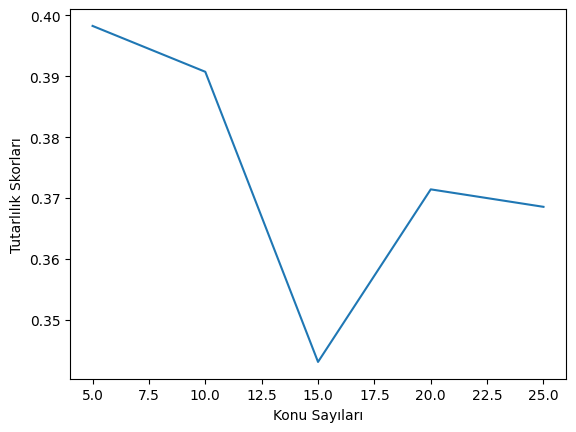

In [11]:
#Tutarlılık skoru görselleştirme
import matplotlib.pyplot as plt

plt.plot(konu_sayisi_listesi, tutarlilik_skorlar_listesi,"-")
print(konu_sayisi_listesi)
print(tutarlilik_skorlar_listesi)
plt.xlabel("Konu Sayıları")
plt.ylabel("Tutarlılık Skorları")

plt.show

In [93]:
#Oluşturulan soyut konular içinde en fazla bulunan terimler

konular = lda_model.print_topics(num_words=7)
konular = sorted(konular, key= lambda x : x[0])
for konu in konular:
    print(konu)

(0, '0.016*"oyun" + 0.016*"oyunların" + 0.016*"ürün" + 0.016*"var" + 0.016*"gün" + 0.008*"almıştım" + 0.008*"kalitesiz"')
(2, '0.025*"ürün" + 0.025*"güzel" + 0.025*"değil" + 0.017*"eski" + 0.017*"kırmızı" + 0.017*"rengini" + 0.009*"geldi"')
(3, '0.014*"oyun" + 0.014*"güzel" + 0.014*"iade" + 0.014*"oyunlar" + 0.009*"kötü" + 0.009*"sadece" + 0.009*"gelmedi"')
(4, '0.037*"ekran" + 0.030*"şarjı" + 0.023*"iyi" + 0.018*"çabuk" + 0.018*"bitiyor" + 0.012*"gitti" + 0.012*"ancak"')
(5, '0.019*"geldi" + 0.013*"paraya" + 0.013*"ben" + 0.013*"oldu" + 0.013*"bozuk" + 0.013*"ekran" + 0.007*"iyi"')
(6, '0.057*"görüntü" + 0.052*"kalitesi" + 0.037*"kötü" + 0.032*"ses" + 0.026*"değil" + 0.017*"iyi" + 0.016*"iade"')
(8, '0.029*"mario" + 0.029*"dışında" + 0.022*"oyun" + 0.022*"iade" + 0.022*"rengi" + 0.022*"onun" + 0.019*"ürün"')
(9, '0.016*"malzeme" + 0.016*"yeri" + 0.013*"guzel" + 0.013*"cok" + 0.013*"kesinlikle" + 0.013*"oyunlar" + 0.012*"ürün"')
(11, '0.053*"ürün" + 0.040*"güzel" + 0.027*"fakat" + 0.02

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Örnek veri seti ve etiketleri
X = df['Metin']
y = df['Durum']

# Veriyi eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vektörleştirici ve LinearSVC sınıflandırıcıyı içeren bir pipeline oluşturun
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC())
])

# Grid Search için parametreler
param_grid = {
    'tfidf__max_features': [1000, 5000, None],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10],
}

# Grid Search ve Cross-Validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# En iyi parametreleri göster
print("En İyi Parametreler:", grid_search.best_params_)

# En iyi modeli kullanarak test seti üzerinde tahmin yapın
y_pred = grid_search.predict(X_test)

# Model performansını değerlendirin
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy}")


En İyi Parametreler: {'clf__C': 1, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}
Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1370
           1       0.92      0.95      0.94      1384
           2       0.65      0.49      0.56       280

    accuracy                           0.91      3034
   macro avg       0.83      0.80      0.81      3034
weighted avg       0.90      0.91      0.90      3034

Doğruluk (Accuracy): 0.9060646011865524
